**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):-**
This project implements the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to explore hidden patterns and natural groupings within a real-world dataset. Unlike K-Means, which assumes clusters are spherical and requires you to specify the number of clusters, DBSCAN automatically identifies clusters based on the density of data points. It groups together closely packed points and labels points that lie alone in sparse regions as noise or outliers, making it highly effective for detecting complex, non-linear cluster shapes and anomalies in real-world data.

The project follows a complete data science workflow, including data loading, cleaning, exploratory data analysis (EDA), feature scaling, parameter tuning (eps and min_samples), and cluster evaluation. Visualizations such as the k-distance plot and PCA-based cluster scatterplots are used to interpret results. The objective is to demonstrate how DBSCAN can uncover meaningful structures in data that might not be captured by traditional clustering algorithms like K-Means. This project highlights the power of density-based clustering for pattern discovery and anomaly detection in unsupervised learning tasks.

In [1]:
# Standard libraries & plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, adjusted_rand_score
from joblib import dump, load

# Plot style
sns.set(style="whitegrid", palette="muted")
%matplotlib inline


In [2]:
# Load Wine dataset from sklearn
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = pd.Series(wine.target, name='target')

print("Shape:", X.shape)
display(X.head())


Shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Basic dataset info & summary (EDA)**

In [3]:
display(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

In [4]:
display(X.describe().T)

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
# Check missing values
print("Missing values per column:")
print(X.isna().sum())

Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


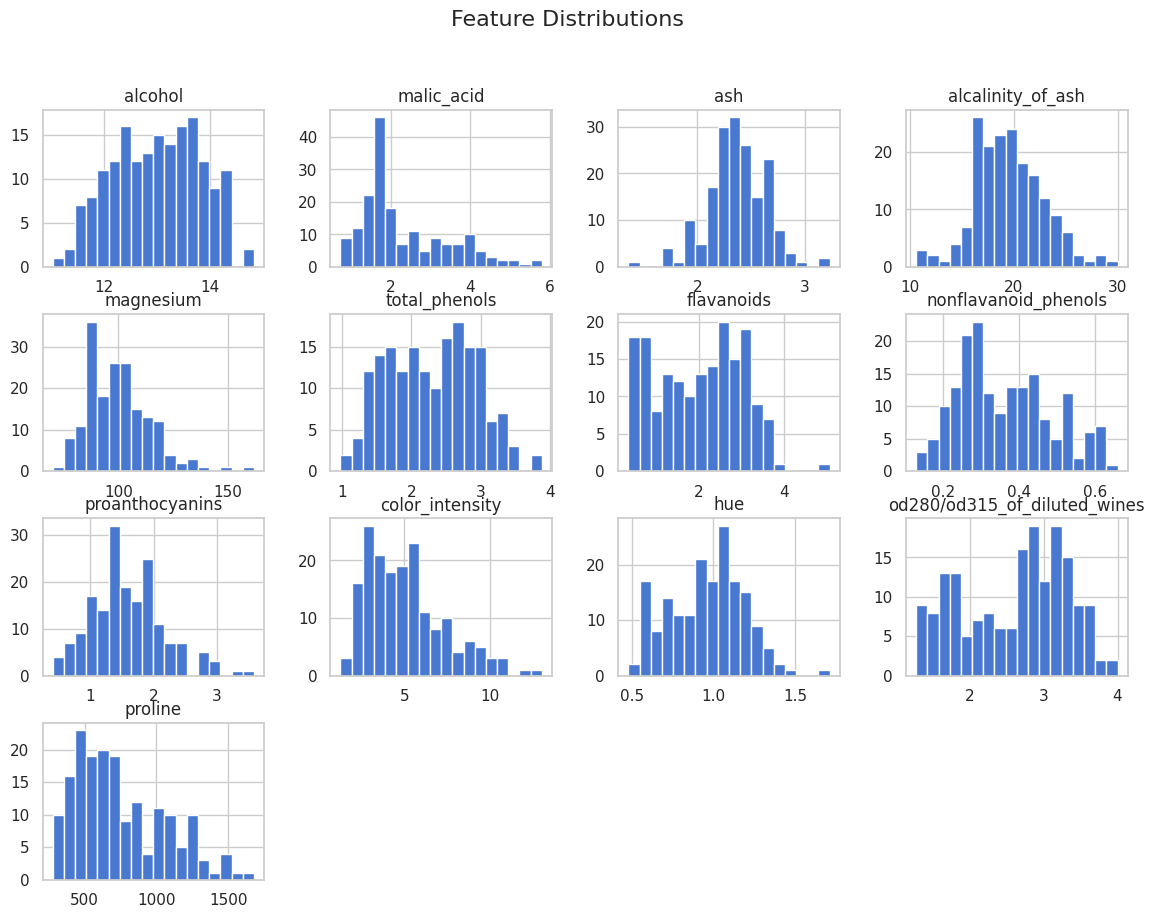

In [6]:
# Histograms
X.hist(bins=18, figsize=(14,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

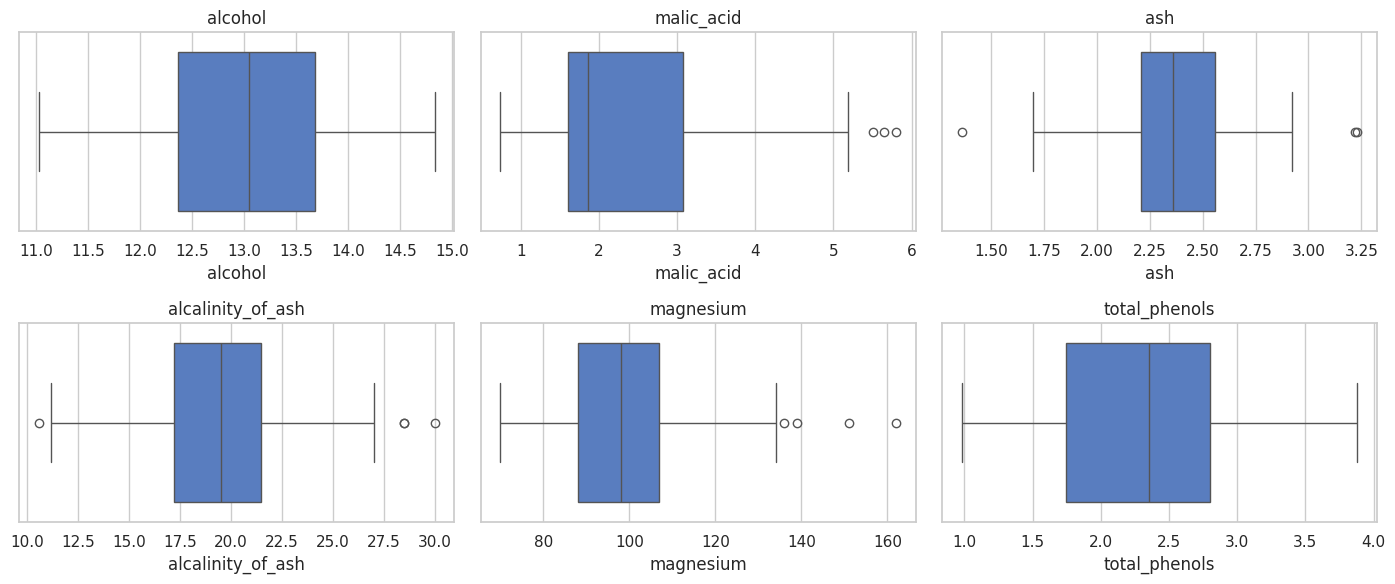

In [7]:
# Boxplots (sample a few columns to keep it tidy)
cols = X.columns.tolist()
plt.figure(figsize=(14,6))
for i, c in enumerate(cols[:6]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=X[c])
    plt.title(c)
plt.tight_layout()
plt.show()


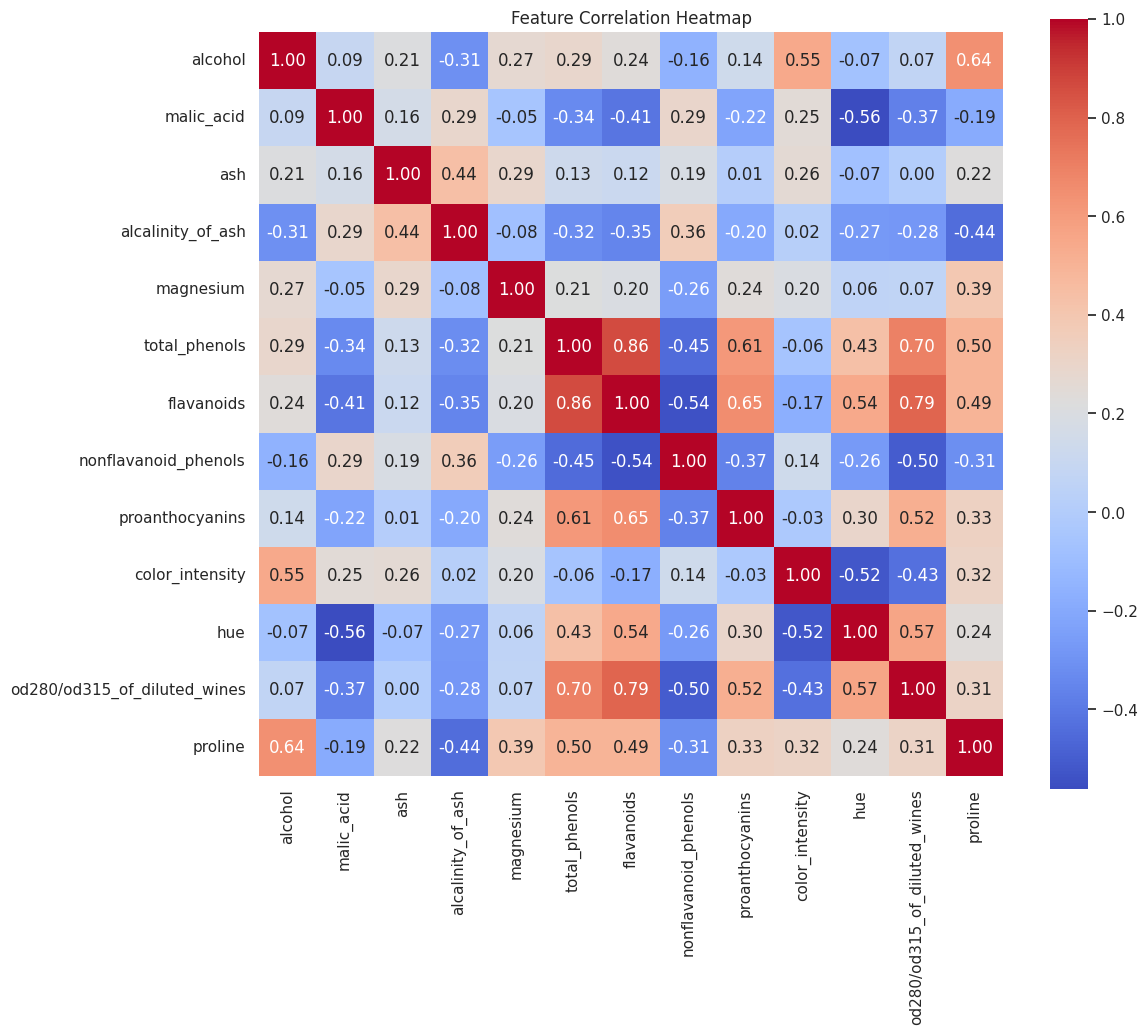

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

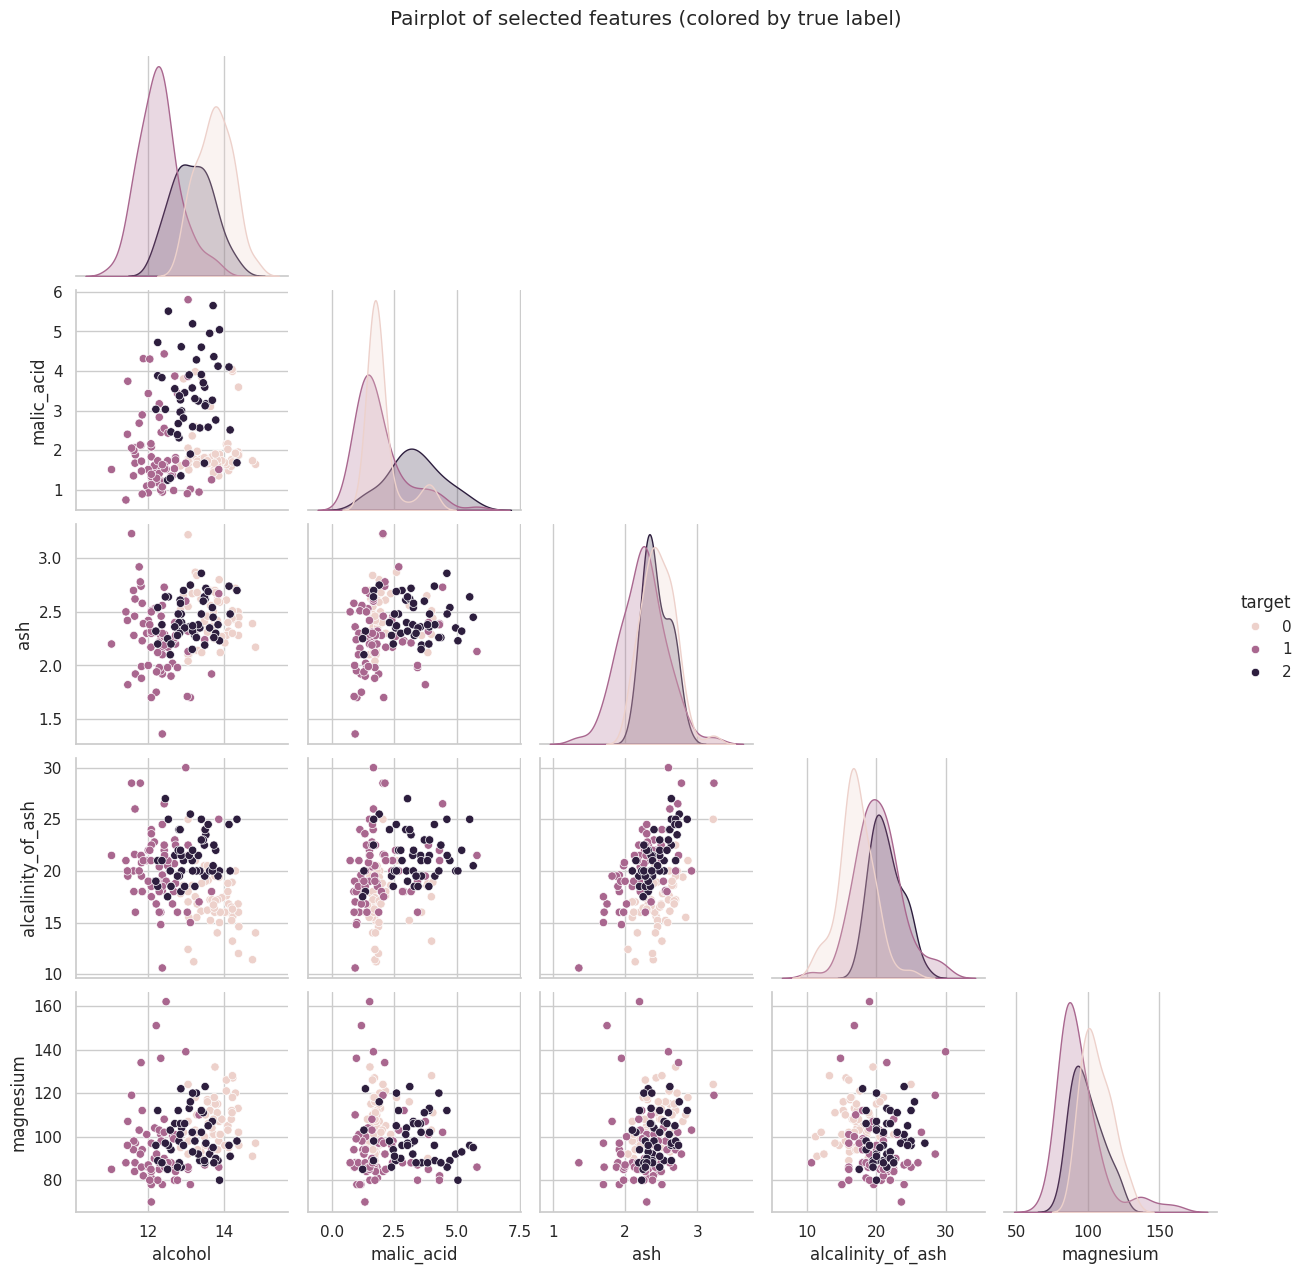

In [9]:
# Pairplot on a small subset or selected features to keep runtime reasonable
sel = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
sns.pairplot(pd.concat([X[sel], y_true], axis=1), hue='target', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of selected features (colored by true label)", y=1.02)
plt.show()


In [10]:
numeric_cols = X.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# convert back to DataFrame for convenience
Xs = pd.DataFrame(X_scaled, columns=numeric_cols)
display(Xs.describe().T)


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


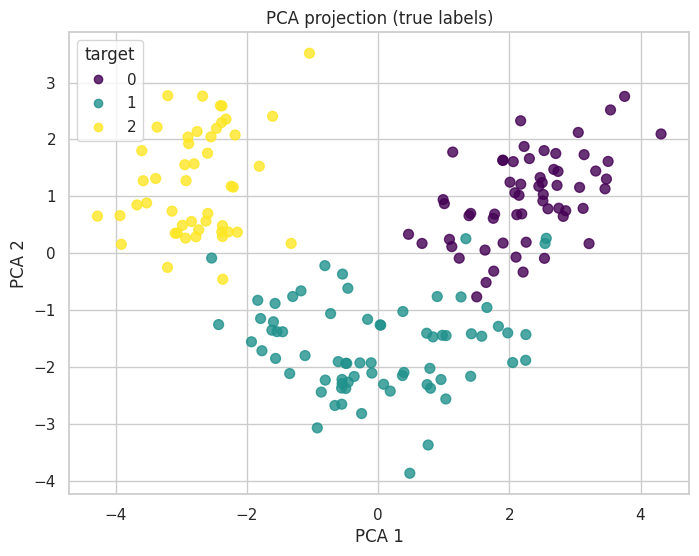

In [11]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.xlabel("PCA 1"); plt.ylabel("PCA 2"); plt.title("PCA projection (true labels)")
plt.legend(*scatter.legend_elements(), title="target")
plt.show()


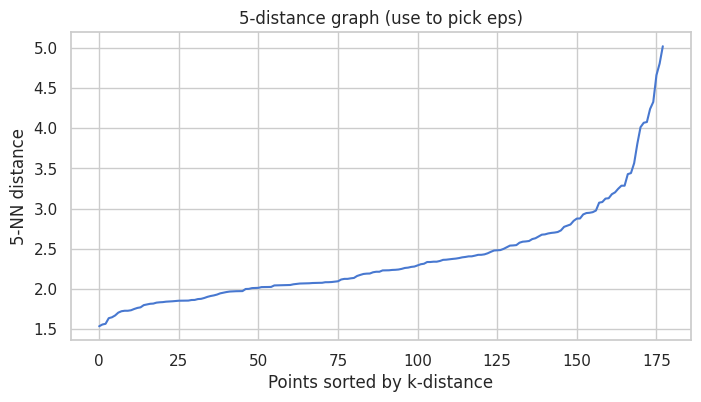

In [12]:
k = 5  # common rule: min_samples = 2*dim or small values; start with 4-6 for this dataset
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, k-1])  # distance to k-th nearest neighbor

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Points sorted by k-distance")
plt.ylabel(f"{k}-NN distance")
plt.title(f"{k}-distance graph (use to pick eps)")
plt.grid(True)
plt.show()

In [13]:
# Based on the k-distance plot choose eps; adjust as needed.
chosen_eps = 0.9
min_samples = 5

db = DBSCAN(eps=chosen_eps, min_samples=min_samples, metric='euclidean')
labels = db.fit_predict(X_scaled)

# Basic stats
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Chosen eps={chosen_eps}, min_samples={min_samples}")
print("Clusters found (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)


Chosen eps=0.9, min_samples=5
Clusters found (excluding noise): 0
Number of noise points: 178


In [15]:

mask = labels != -1
if len(set(labels[mask])) > 1:
    sil = silhouette_score(X_scaled[mask], labels[mask])
    print(f"Silhouette score (excluding noise): {sil:.3f}")
else:
    print("Silhouette score not defined (fewer than 2 clusters after removing noise).")
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index (vs true labels): {ari:.3f}")


Silhouette score not defined (fewer than 2 clusters after removing noise).
Adjusted Rand Index (vs true labels): 0.000


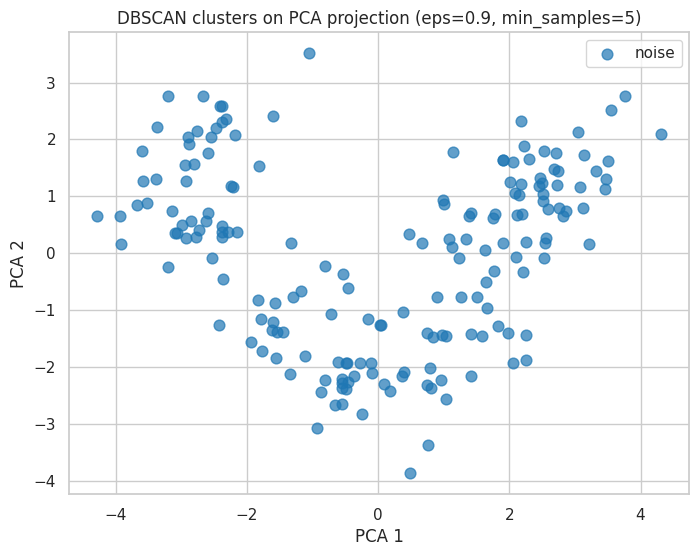

In [16]:
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels)
palette = sns.color_palette("tab10", len(unique_labels))
for lab, color in zip(unique_labels, palette):
    mask_lab = labels == lab
    label_name = "noise" if lab == -1 else f"cluster {lab}"
    plt.scatter(X_pca[mask_lab,0], X_pca[mask_lab,1], c=[color], label=label_name, s=60, alpha=0.7, edgecolors='k' if lab!=-1 else None)

plt.legend()
plt.title(f"DBSCAN clusters on PCA projection (eps={chosen_eps}, min_samples={min_samples})")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.show()


In [17]:
# Simple grid search (coarse) — be careful with runtime
eps_values = np.linspace(0.3, 1.6, 14)  # adjust range based on k-distance earlier
min_samples_values = [3,4,5,6,8]

results = []
for eps in eps_values:
    for ms in min_samples_values:
        db_tmp = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
        lab_tmp = db_tmp.labels_
        mask_tmp = lab_tmp != -1
        n_clusters_tmp = len(set(lab_tmp)) - (1 if -1 in lab_tmp else 0)
        n_noise_tmp = list(lab_tmp).count(-1)
        if n_clusters_tmp >= 2 and mask_tmp.sum() > 0:
            sil_tmp = silhouette_score(X_scaled[mask_tmp], lab_tmp[mask_tmp])
        else:
            sil_tmp = np.nan
        results.append({'eps': eps, 'min_samples': ms, 'n_clusters': n_clusters_tmp, 'n_noise': n_noise_tmp, 'silhouette': sil_tmp})

res_df = pd.DataFrame(results)
display(res_df.sort_values('silhouette', ascending=False).head(10))


,eps,min_samples,n_clusters,n_noise,silhouette
55,1.4,3,4,165,0.533033
67,1.6,5,3,162,0.502071
61,1.5,4,2,169,0.406702
60,1.5,3,8,147,0.331067
66,1.6,4,7,144,0.312758
65,1.6,3,10,124,0.255357
0,0.3,3,0,178,NaN
1,0.3,4,0,178,NaN
2,0.3,5,0,178,NaN
3,0.3,6,0,178,NaN


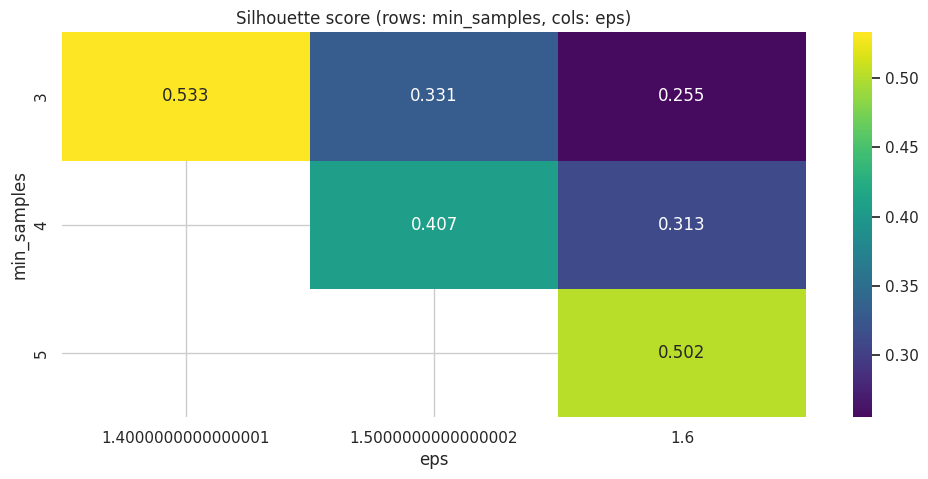

In [18]:
# Pivot for heatmap
pivot = res_df.pivot_table(index='min_samples', columns='eps', values='silhouette')
plt.figure(figsize=(12,5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis', center=np.nanmean(res_df['silhouette'].dropna()))
plt.title("Silhouette score (rows: min_samples, cols: eps)")
plt.xlabel("eps"); plt.ylabel("min_samples")
plt.show()


In [19]:
from joblib import dump
dump(db, "dbscan_model.joblib")
dump(scaler, "scaler.joblib")+
print("Saved: dbscan_model.joblib, scaler.joblib")

Saved: dbscan_model.joblib, scaler.joblib
